## 1. Review and Analyze Dataset
Customer return Dataset

## 2. Define the business problems
Your job as our employee or business student is to build a model to help the retailer predict the amount of return loss. The dependent variable (or y variable or variable of interest) is return_loss. The remaining independent or X variables will help us with our prediction. 

## 3. Determine and document the business requirements/problems.
Predict Return Loss base on other parameters

## 4. Install packages

In [93]:
#install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize

## 5. Load the dataset

In [21]:
# Read data
df = pd.read_csv("CustomerReturns.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             97 non-null     int64
 1   Education          97 non-null     int64
 2   Race               97 non-null     int64
 3   Home_ownership     97 non-null     int64
 4   Age                97 non-null     int64
 5   Tenure             97 non-null     int64
 6   Num_purchase       97 non-null     int64
 7   Lifetime_purchase  97 non-null     int64
 8   Ave_price          97 non-null     int64
 9   num_of_returns     97 non-null     int64
 10  Amt_returned       97 non-null     int64
 11  return_loss        97 non-null     int64
dtypes: int64(12)
memory usage: 9.2 KB


In [23]:
df.dtypes

Gender               int64
Education            int64
Race                 int64
Home_ownership       int64
Age                  int64
Tenure               int64
Num_purchase         int64
Lifetime_purchase    int64
Ave_price            int64
num_of_returns       int64
Amt_returned         int64
return_loss          int64
dtype: object

## 6. EDA, Data Cleaning, and Visualization

### a. Check the Loaded Data

In [24]:
# check loaded data
df.head()

,Gender,Education,Race,Home_ownership,Age,Tenure,Num_purchase,Lifetime_purchase,Ave_price,num_of_returns,Amt_returned,return_loss
0,1,0,0,0,44,52,21,18590,885,8,7082,1416
1,1,0,0,0,20,8,15,17184,1146,8,9165,1833
2,0,1,0,0,45,6,13,15024,1156,8,9246,1849
3,0,1,1,0,35,3,5,5822,1164,8,9316,1863
4,1,0,1,0,24,12,18,27480,1527,8,12213,2443


### a.1. Check Data Types

In [25]:
# Check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             97 non-null     int64
 1   Education          97 non-null     int64
 2   Race               97 non-null     int64
 3   Home_ownership     97 non-null     int64
 4   Age                97 non-null     int64
 5   Tenure             97 non-null     int64
 6   Num_purchase       97 non-null     int64
 7   Lifetime_purchase  97 non-null     int64
 8   Ave_price          97 non-null     int64
 9   num_of_returns     97 non-null     int64
 10  Amt_returned       97 non-null     int64
 11  return_loss        97 non-null     int64
dtypes: int64(12)
memory usage: 9.2 KB


### a.2. Check Missing Values

In [26]:
# check missing values
df.isnull().sum()

Gender               0
Education            0
Race                 0
Home_ownership       0
Age                  0
Tenure               0
Num_purchase         0
Lifetime_purchase    0
Ave_price            0
num_of_returns       0
Amt_returned         0
return_loss          0
dtype: int64

In [78]:
# remove null values 
# df = df.dropna(inplace=True)

### a.3. Check Outliers

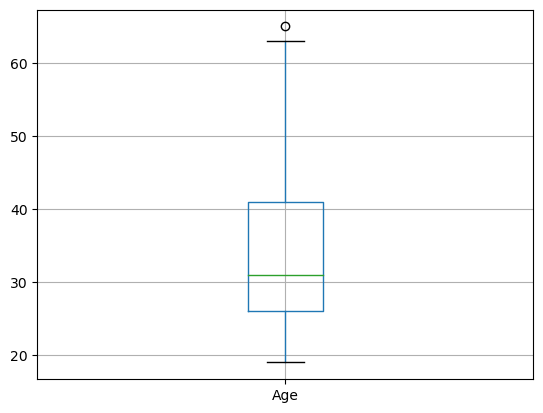

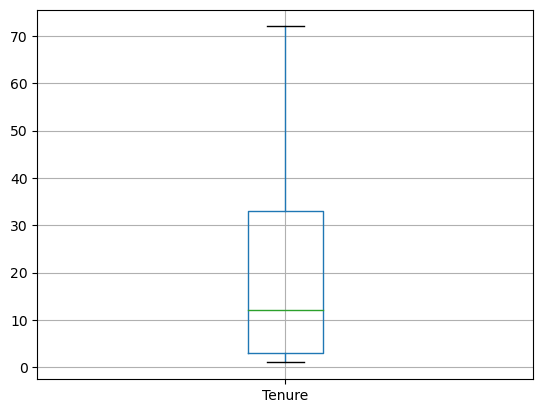

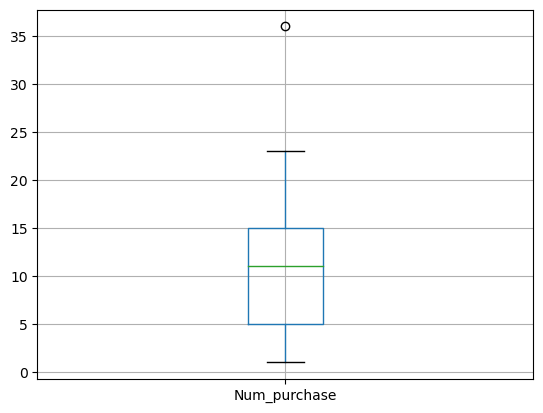

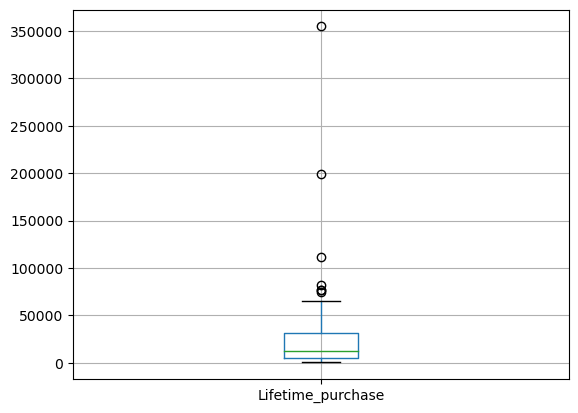

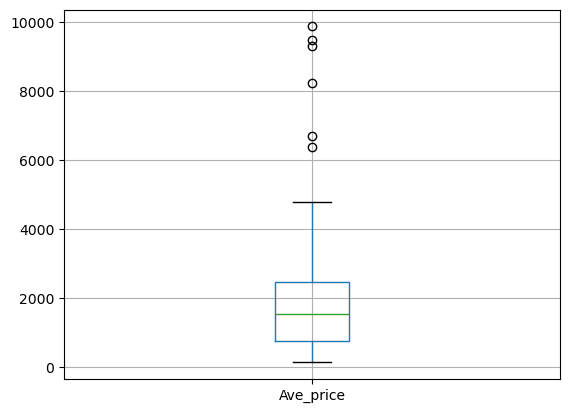

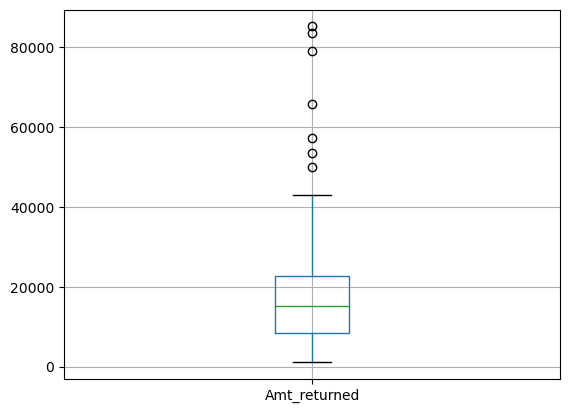

In [56]:
# Remove outliers
for column in df.columns.drop(['Gender', 'Education', 'Race', 'Home_ownership', 'return_loss', 'num_of_returns']):
    df[[column]].boxplot()
    plt.show()

In [79]:
# Remove outliers
df = df[(df[column] >= df[column].quantile(0.05)) & (df[column] <= df[column].quantile(0.95))]

### b. Visualize

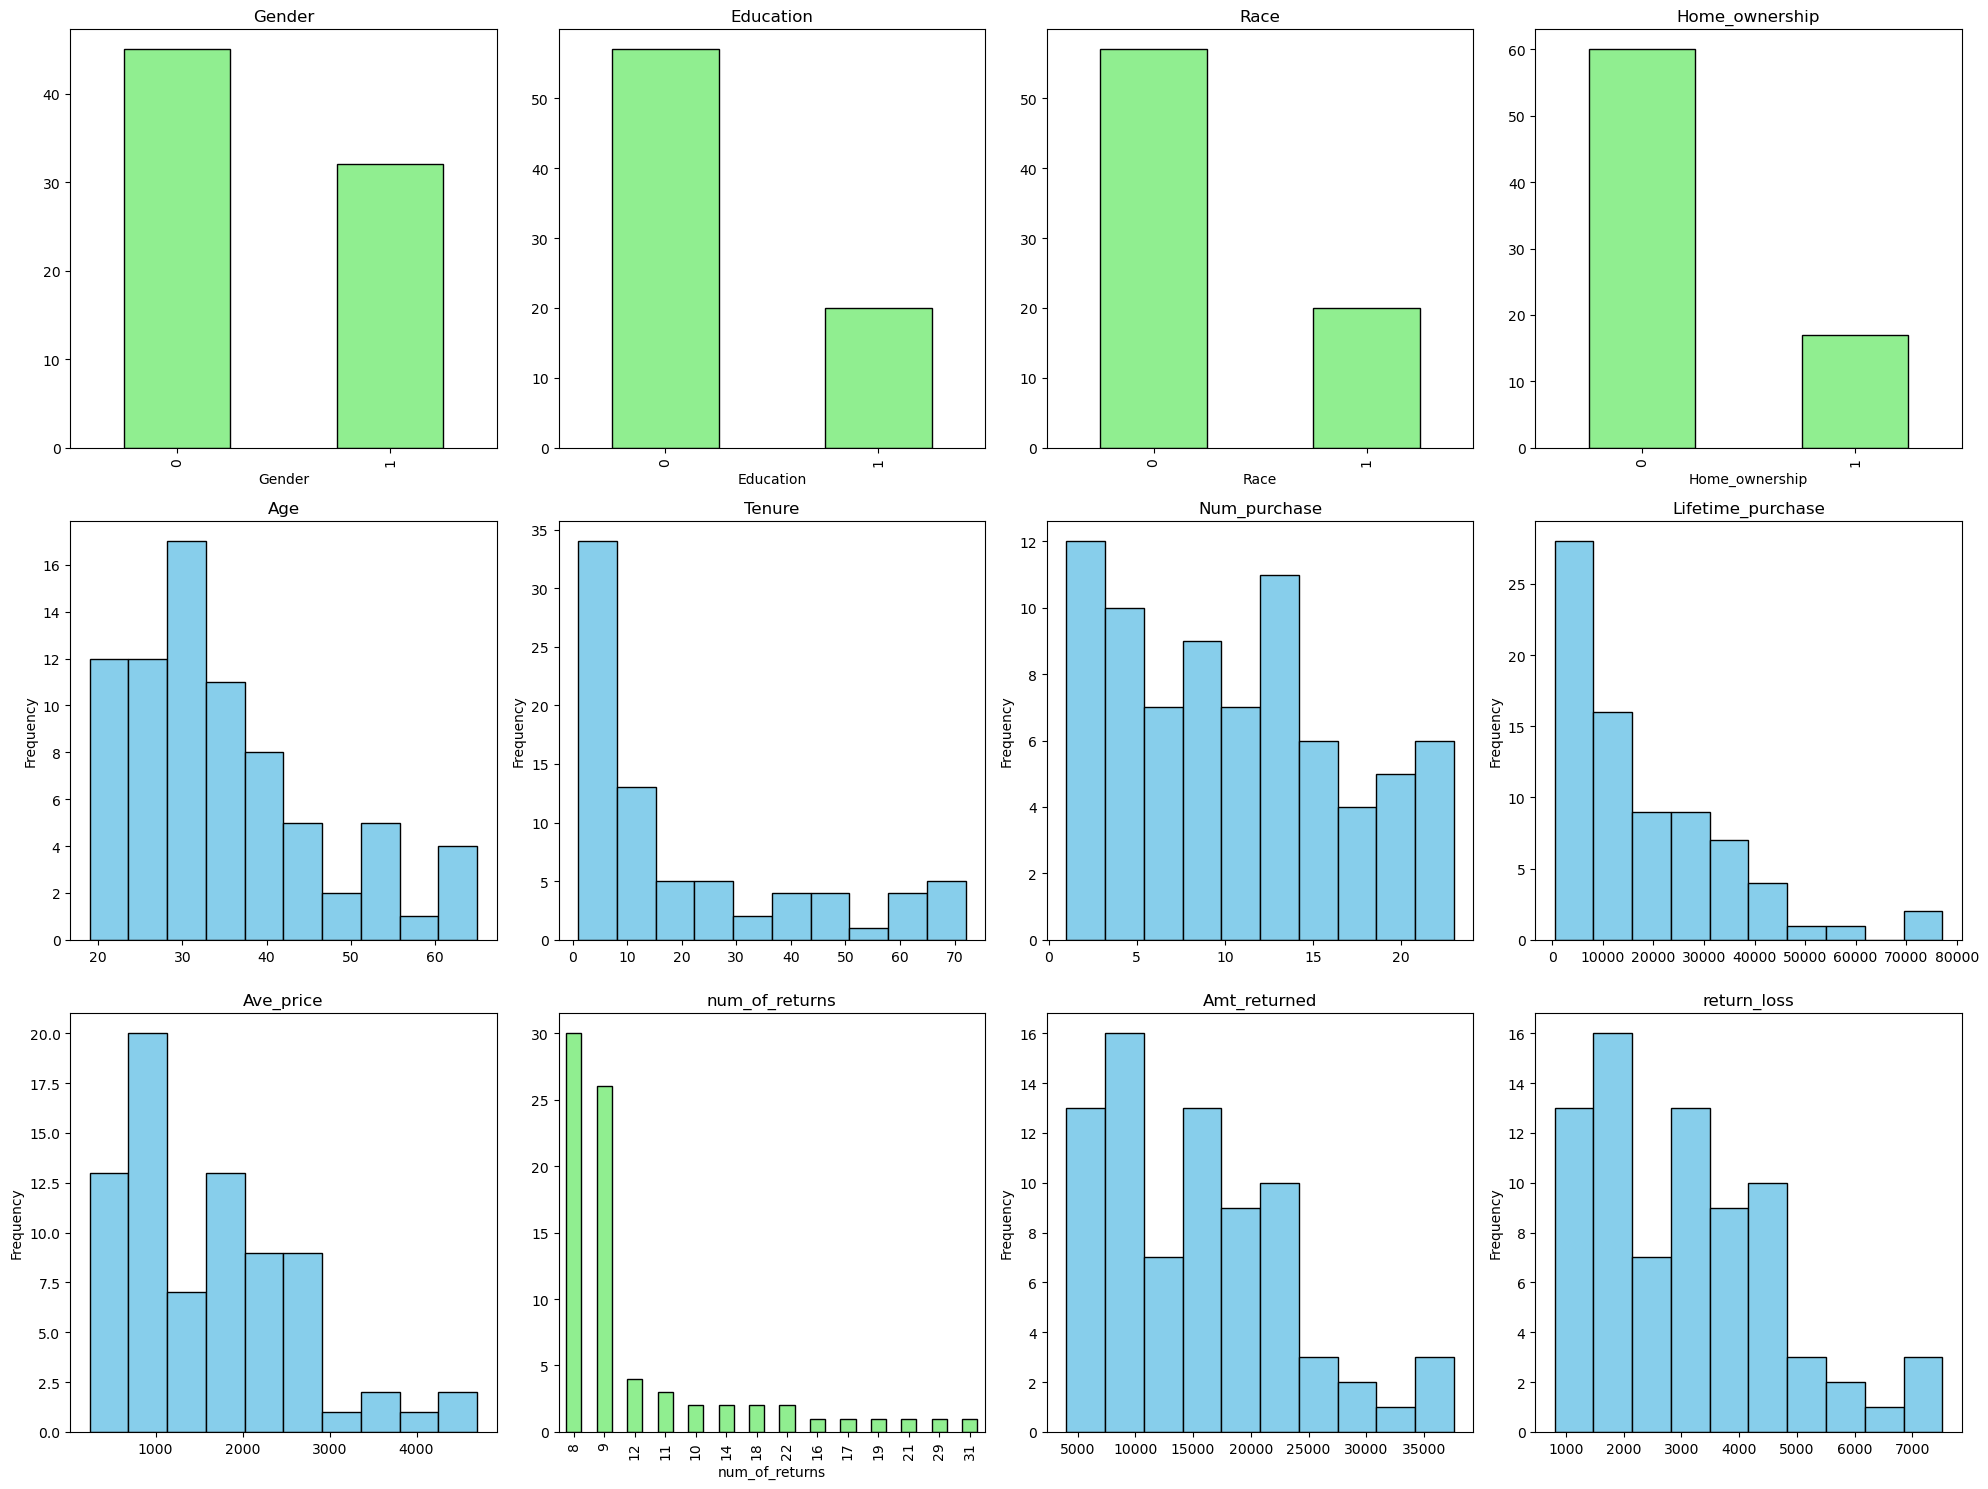

In [94]:
# Plotting
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, column in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    if column in ['Gender', 'Education', 'Race', 'Home_ownership', 'num_of_returns']:
        # For categorical columns, plot bar chart
        df[column].value_counts().plot(kind='bar', ax=ax, title=column, color='lightgreen', edgecolor='black')
    else:
        # For numerical columns, plot histogram
        df[column].plot(kind='hist', ax=ax, title=column, color='skyblue', edgecolor='black')

plt.tight_layout()
plt.show()

input a catgorical column:Home_ownership


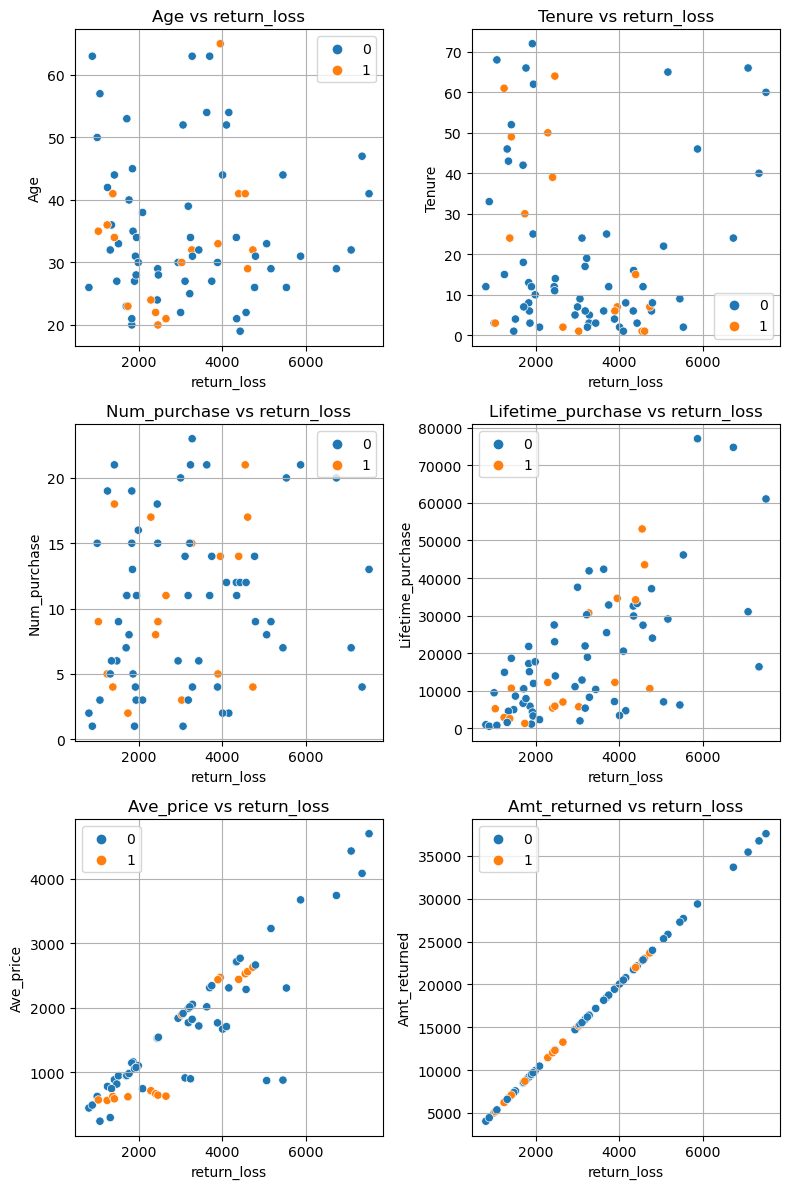

In [105]:
# Selecting only numerical columns excluding 'return_loss'
numerical_columns = df.columns.drop(['Gender', 'Education', 'Race', 'Home_ownership', 'num_of_returns', 'return_loss'])
cat_col = str(input('input a catgorical column:'))
# Plotting scatter plots in subplots
num_plots = len(numerical_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4*num_rows))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Use Seaborn to create scatter plot with different colors for different genders
    sns.scatterplot(data=df, x='return_loss',y=column, hue=cat_col, ax=ax)
    
    ax.set_title(f'{column} vs return_loss')
    ax.set_ylabel(column)
    ax.set_xlabel('return_loss')
    ax.grid(True)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

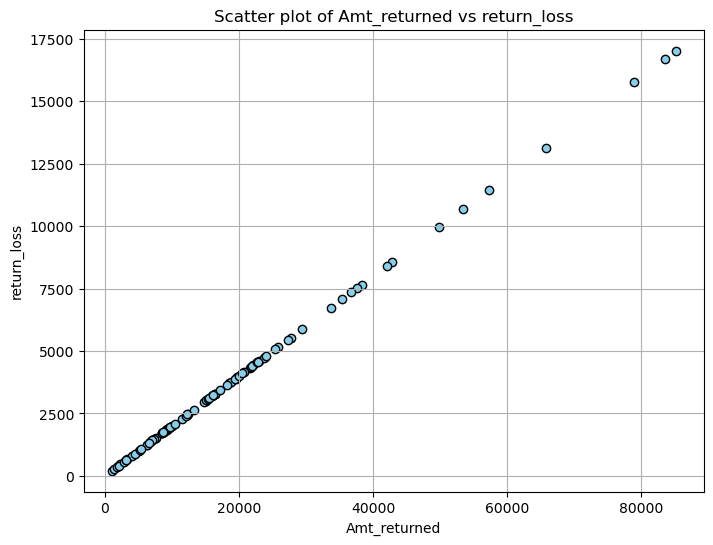

In [39]:
# Scatter plot for amount returned vs return loss
plt.figure(figsize=(8, 6))
plt.scatter(df['Amt_returned'], df['return_loss'], color='skyblue', edgecolor='black')
plt.title('Scatter plot of Amt_returned vs return_loss')
plt.xlabel('Amt_returned')
plt.ylabel('return_loss')
plt.grid(True)
plt.show()

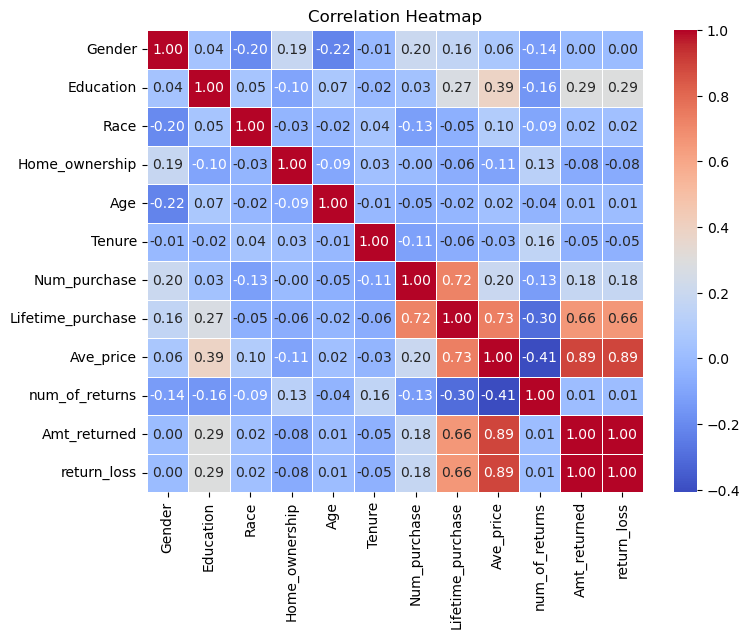

In [91]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [60]:
# normalize the data
# df = pd.DataFrame(normalize (df), columns= df.columns)

In [86]:
# define the x and y variables
x=df.drop(['return_loss','Amt_returned'],axis='columns')
y=df['return_loss']

In [92]:
x=df.drop(['return_loss','Amt_returned'],axis='columns')
y=df['return_loss']

model1 = sm.OLS(y, x).fit()
print (model1.summary())

                                 OLS Regression Results                                
Dep. Variable:            return_loss   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              686.2
Date:                Sun, 28 Jan 2024   Prob (F-statistic):                    2.18e-63
Time:                        13:46:55   Log-Likelihood:                         -559.09
No. Observations:                  77   AIC:                                      1138.
Df Residuals:                      67   BIC:                                      1162.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [115]:
# Making predictions
y_pred = model1.predict(x)

# Calculating residuals
residuals = y - y_pred

# Computing RMSE
rmse = np.sqrt(np.mean(residuals**2))

print("Root Mean Squared Error (RMSE):", rmse)



Root Mean Squared Error (RMSE): 344.44003621771463


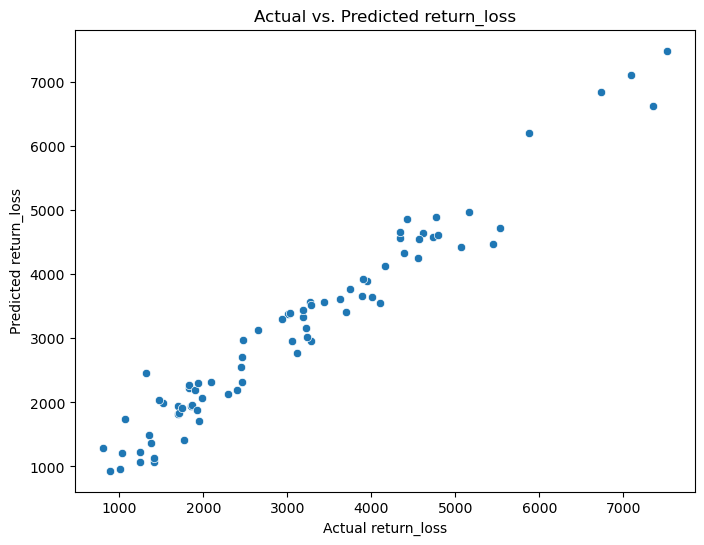

In [110]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel('Actual return_loss')
plt.ylabel('Predicted return_loss')
plt.title('Actual vs. Predicted return_loss')
plt.show()

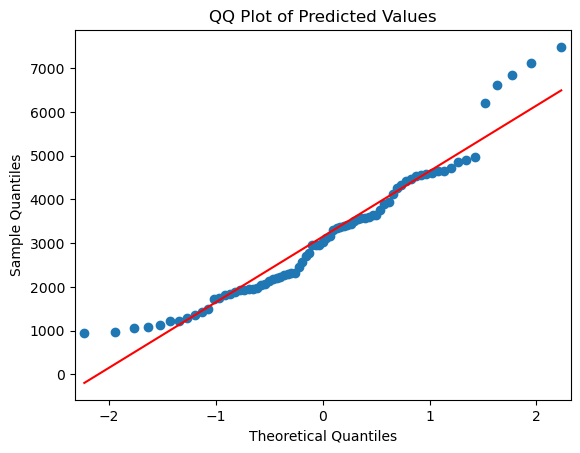

In [117]:
# check qq plot
from statsmodels.graphics.gofplots import qqplot

# Assuming you have already defined y and y_pred as mentioned in your code snippet

# Create a QQ plot
qqplot(y_pred, line='s')  # 's' denotes a standardized line
plt.title('QQ Plot of Predicted Values')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [113]:
print("Linear Regression Formula:")
print("return_loss =", end=" ")

# Print the intercept
print(f"{model1.params[0]:.2f}", end=" ")

# Print the coefficients for other features
for i in range(1, len(model1.params)):
    print(f"+ {model1.params[i]:.2f} * {x.columns[i-1]}", end=" ")

print()

Linear Regression Formula:
return_loss = -149.29 + -199.50 * Gender + -217.87 * Education + -108.40 * Race + -11.51 * Home_ownership + -7.60 * Age + -23.28 * Tenure + 0.01 * Num_purchase + 1.58 * Lifetime_purchase + 127.62 * Ave_price 


## Multivariable Linear Regression Formula

$$
\begin{align*}
\text{return_loss }  = & -149.29 - 199.50 \times \text{Gender} \\
& -217.87 \times \text{Education} - 108.40 \times \text{Race} \\
& - 11.51 \times \text{Home_ownership} - 7.60 \times \text{Age} \\
& - 23.28 \times \text{Tenure} + 0.01 \times \text{Num_purchase} \\
& + 1.58 \times \text{Lifetime_purchase} + 127.62 \times \text{Ave_price}
\end{align*}
$$
